# Effort and cost Estimation in Agile Software Development

In [183]:
#@title Effort Estimation on Maxwell
import math
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.metrics import classification_report

data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/datasets/maxwell.csv')

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/datasets/maxwell.csv')

In [186]:
data_read.head()

,Syear,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,...,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
0,92,2,2,1,2,2,0,3,4,3,...,5,4,4,4,4,5,16,647,8,7871
1,93,2,2,1,2,2,0,3,2,3,...,3,4,4,4,4,4,5,130,9,845
2,90,1,2,1,2,2,0,2,3,3,...,5,4,3,2,3,3,8,254,6,2330
3,86,3,2,1,2,2,0,3,2,2,...,4,5,4,3,2,3,16,1056,2,21272
4,88,2,2,1,2,2,0,2,3,3,...,4,3,4,5,4,4,12,383,4,4224


In [187]:
#@title Defining Category 1 and Category 2


features = [	'Duration' ,	'Size',	'Time', 'App',	'Har',	'Dba',	'Ifc',	'Source']




Cat_1 = data_read[features]
Cat_2 = data_read['Effort']

In [188]:
#For Debugging Purpose
 
##Cat_1=data_read.drop(['Actual_Cost'],axis=1).values
#Cat_1=data_read(db_a).values
#Cat_1=data_read['Effort',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Team_Salary',	'Act_Time',	'Est_time'].values
##Cat_2=data_read['Actual_Cost'].values



#@title Describing Categorical Data 
Cat_1.describe()


,Duration,Size,Time,App,Har,Dba,Ifc,Source
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,17.209677,673.306452,5.580645,2.354839,2.612903,1.032258,1.935484,1.870968
std,10.651156,784.084505,2.131331,0.993368,0.997617,0.442339,0.247676,0.337972
min,4.000000,48.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,10.000000,232.500000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,13.500000,385.000000,6.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,23.500000,640.750000,7.000000,3.000000,3.000000,1.000000,2.000000,2.000000
max,54.000000,3643.000000,9.000000,5.000000,5.000000,4.000000,2.000000,2.000000


In [189]:
#For debugging purpose
#print(Cat_1)

In [190]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,Duration,Size,Time,App,Har,Dba,Ifc,Source
0,16,647,8,2,2,1,2,2
1,5,130,9,2,2,1,2,2
2,8,254,6,1,2,1,2,2
3,16,1056,2,3,2,1,2,2
4,12,383,4,2,2,1,2,2
...,...,...,...,...,...,...,...,...
57,20,495,7,5,5,1,2,1
58,16,622,6,3,3,1,2,2
59,12,204,8,1,2,1,2,2
60,15,616,6,3,3,1,2,2


In [191]:
print('The overall number of projects are: ',len(Cat_2))

The overall number of projects are:  62


In [192]:
display(Cat_2)

0      7871
1       845
2      2330
3     21272
4      4224
      ...  
57     7105
58     6816
59     4620
60     7451
61    39479
Name: Effort, Length: 62, dtype: int64

In [193]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [194]:
import math
print(y_test)


30    2957
32    1233
33    3240
48    1755
51    3600
35    6800
11     900
45    8710
2     2330
43    5279
26    1651
4     4224
10    4150
Name: Effort, dtype: int64


In [195]:
print(y_pred1)

[9468.55555404 1320.94483281 1602.71592942 3250.15639375 8016.01134639
 3562.88260139  820.02293439 5260.14084047 2901.7403831  2193.75183114
 -285.54111748 5953.97317149 5535.04767483]


In [196]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

In [197]:
from sklearn.metrics import r2_score


import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math




print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred1))

diff=np.absolute(y_test-y_pred1)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#linear effort

The r Score on the predictrd trained Set: -0.73
MMRE 0.6588014092941769
MdMRE 0.47604667626545344
PRED 25% 23.076923076923077


In [198]:

#   diff=np.absolute(y_test-y_pred1)
#   MRE=diff/y_test
#   MMRE=np.mean(MRE)

# print('MMRE :',MMRE)

Text(0.5, 1.0, 'Effort Actual vs Predicted Linear Regresssion')

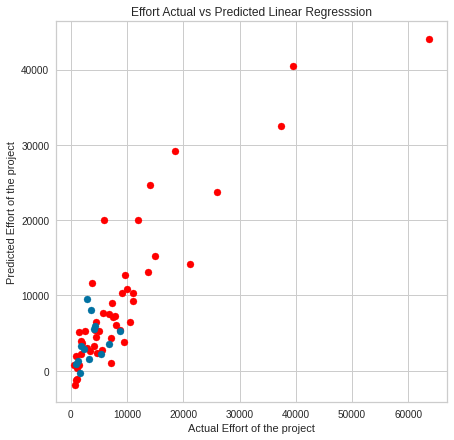

In [199]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Effort of the project')
plt.ylabel('Predicted Effort of the project')
plt.title('Effort Actual vs Predicted Linear Regresssion')




In [200]:
##Debugging pur   
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [201]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1})

#print(pred_y_diff.dtypes)
#
#pred_y_diff= pd.DataFrame(range(3), columns=['y_pred1'])
#pred_y_diff.y_pred1 = pred_y_diff.y_pred1.astype(float)


pred_y_diff[0:62]


,Actual Values of Cost,Predicted Cost,Difference
30,2957,9468.555554,-6511.555554
32,1233,1320.944833,-87.944833
33,3240,1602.715929,1637.284071
48,1755,3250.156394,-1495.156394
51,3600,8016.011346,-4416.011346
35,6800,3562.882601,3237.117399
11,900,820.022934,79.977066
45,8710,5260.140840,3449.859160
2,2330,2901.740383,-571.740383
43,5279,2193.751831,3085.248169


In [202]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [203]:

print(arr)

    Actual  Cost
30          2957
32          1233
33          3240
48          1755
51          3600
35          6800
11           900
45          8710
2           2330
43          5279
26          1651
4           4224
10          4150


In [204]:
print(np.absolute(arr2))

     Difference
30  6511.555554
32    87.944833
33  1637.284071
48  1495.156394
51  4416.011346
35  3237.117399
11    79.977066
45  3449.859160
2    571.740383
43  3085.248169
26  1936.541117
4   1729.973171
10  1385.047675


In [205]:
arr22= [];
arr11=[];
i=1
k=1
for i in arr:
  xx= arr[i]
  arr22.append(xx)
for k in arr1:
  yy= arr1[k]
  arr11.append(yy)

In [206]:
#print(arr22[0][0])
#print(arr11[0][0])
print(len(arr11))
Diff=[];
i=0
#for i in range(0,5):
   # vv=arr22[0][i]-arr11[0][i]
#    Diff.append(vv)
#    print(vv)

1


In [207]:
#pred_y_diff = pd.DataFrame({'Actual  Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1,'MMRE':1/6((y_test-y_pred1)/y_test) })

In [208]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred))

diff=np.absolute(y_test-y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)


#KNN EFFORT

The r Score on the predictrd trained Set: -3.43
MMRE 0.9032603846283132
MdMRE 0.5096293489928647
PRED 25% 15.384615384615385


In [209]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'MRE':(y_test-y_pred)/y_test})


pred_mre[0:62]

,Actual Values of Cost,Predicted Cost,MRE
30,2957,12289.666667,-3.156127
32,1233,813.000000,0.340633
33,3240,11986.333333,-2.699486
48,1755,2605.000000,-0.484330
51,3600,5351.666667,-0.486574
35,6800,14290.666667,-1.101569
11,900,1693.666667,-0.881852
45,8710,14290.666667,-0.640719
2,2330,1882.000000,0.192275
43,5279,7969.333333,-0.509629


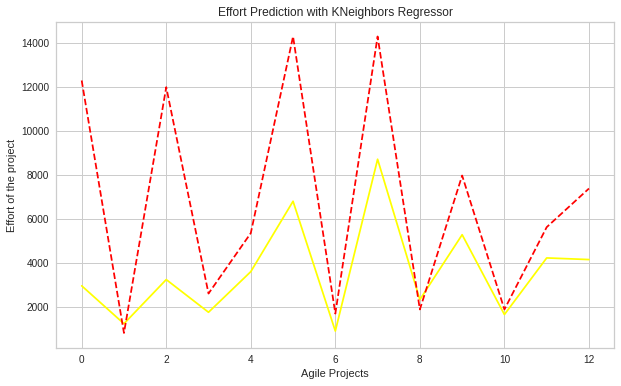

In [210]:
 #plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred , label='Predicted values ' , color='red' , linestyle ='--')

plt.xlabel('Agile Projects')
plt.ylabel('Effort of the project')
plt.title('Effort Prediction with KNeighbors Regressor')
#plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show()

----------------------------

In [211]:
# #@title CALCULATING THE MMRE

# #MAKING THE VALUES ABSOLUTE 
# xyy=pred_mre.MRE.abs()
# Raw_mean = xyy.sum()/len(pred_mre) #Total Projects in the Dataset are 21
# #print('MMRE :',Raw_mean)

# # percentage MMRE 
# print(Raw_mean)
# #print('Percentage MMRE :',Raw_mean*100)

Decision Tree Implementation

## Decision Tree Implementation 

In [212]:
data_read.head()

,Syear,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,...,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
0,92,2,2,1,2,2,0,3,4,3,...,5,4,4,4,4,5,16,647,8,7871
1,93,2,2,1,2,2,0,3,2,3,...,3,4,4,4,4,4,5,130,9,845
2,90,1,2,1,2,2,0,2,3,3,...,5,4,3,2,3,3,8,254,6,2330
3,86,3,2,1,2,2,0,3,2,2,...,4,5,4,3,2,3,16,1056,2,21272
4,88,2,2,1,2,2,0,2,3,3,...,4,3,4,5,4,4,12,383,4,4224


In [213]:
#Now to Prepare the Input and Output Features
X= data_read.drop(['Effort'],axis=1)
X.shape

(62, 26)

In [214]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [215]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [216]:
#The Coeffitient of Detern=mination 
print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

Training R_sq is : 1.00


In [217]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [218]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)



In [219]:

# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_train,y_train_pred))

The r_sq  is: 1.00


In [220]:
#prediction on testing the data
y_test_pred_dt = regressor1.predict(X_test)
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_dt))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_dt))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_dt))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 11340113.461538462
Mean Absolute Error:: 2298.3846153846152
Root Mean Squared Error:: 3367.508494649785


In [221]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))



The r Score on the predictrd trained Set: -1.37


<function matplotlib.pyplot.show(*args, **kw)>

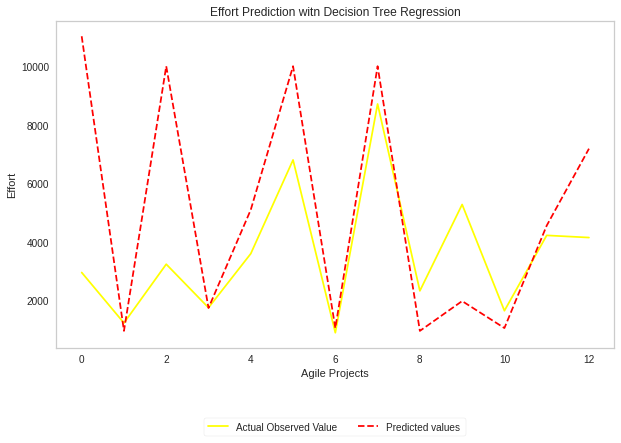

In [222]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [223]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:62]

,Actual Values of Effort,Predicted Effort,MRE
30,2957,11023.0,-2.727765
32,1233,963.0,0.218978
33,3240,10000.0,-2.086420
48,1755,1745.0,0.005698
51,3600,5100.0,-0.416667
35,6800,10000.0,-0.470588
11,900,1060.0,-0.177778
45,8710,10000.0,-0.148106
2,2330,963.0,0.586695
43,5279,1981.0,0.624740


CALCULATING MRE MMRE MdMRE and PRED 25

In [224]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))

diff=np.absolute(y_test-y_test_pred_dt)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#DT EFFORT

The r Score on the predictrd trained Set: -1.37
MMRE 0.6639475415470317
MdMRE 0.4166666666666667
PRED 25% 38.46153846153847


In [225]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:62]

,Actual Values of Effort,Predicted Effort,Difference
30,2957,11023.0,-8066.0
32,1233,963.0,270.0
33,3240,10000.0,-6760.0
48,1755,1745.0,10.0
51,3600,5100.0,-1500.0
35,6800,10000.0,-3200.0
11,900,1060.0,-160.0
45,8710,10000.0,-1290.0
2,2330,963.0,1367.0
43,5279,1981.0,3298.0


In [226]:
#@title Random Forest Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [227]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [228]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [229]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [230]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

The Model Score on the predictrd training Set: 0.94
r2 Score  -0.013099900735002779


In [231]:
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 4840608.182735043
Mean Absolute Error:: 1576.102564102564
Root Mean Squared Error:: 2200.138219006943


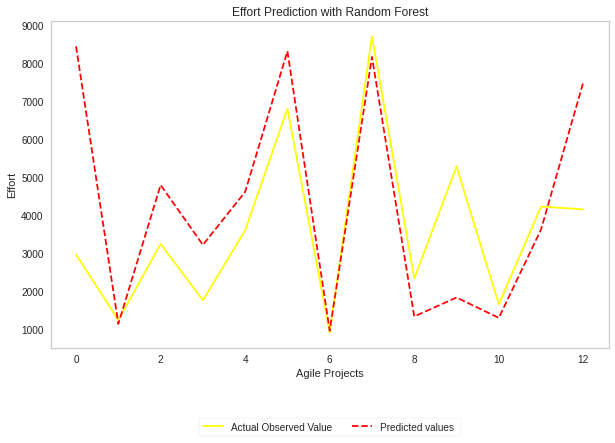

In [232]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [233]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:62]

,Actual Values of Cost,Predicted Cost,MRE
30,2957,8444.966667,-1.855924
32,1233,1132.400000,0.081590
33,3240,4792.500000,-0.479167
48,1755,3214.533333,-0.831643
51,3600,4610.633333,-0.280731
35,6800,8316.766667,-0.223054
11,900,952.266667,-0.058074
45,8710,8166.433333,0.062407
2,2330,1329.266667,0.429499
43,5279,1828.200000,0.653684


In [234]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_rf))

diff=np.absolute(y_test-y_test_pred_rf)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)



The r Score on the predictrd trained Set: -0.01
MMRE 0.47104924702846585
MdMRE 0.28073148148148147
PRED 25% 46.15384615384615


In [235]:
#@title CALCULATING THE MMRE

#MAKING THE VALUES ABSOLUTE 
xyy=pred_mre.MRE.abs()
Raw_mean = xyy.sum()/ypredx #Total Projects in the Dataset are 21
print('MMRE :',Raw_mean)

MMRE_RF = Raw_mean*100
# percentage MMRE 
###print(' MMRE in Percentage :',Raw_mean*100,'%')

MMRE : 0.47104924702846585


# Support Vector Machine

In [236]:
#@title Support Vector
#import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV


# Categorical To continious 
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


svm = SVC(kernel="linear",C=1)
svm.fit(X_train,y_train)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)

y_pred_svm=svm.predict(X_test)
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#
print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred_svm)))

print("Mean Squared Error::",mean_squared_error(y_test,y_pred_svm))
xv= math.sqrt(mean_squared_error(y_test,y_pred_svm))
print("Root Mean Squared Error::",xv)


Mean Absolute error::: 67.21263617459489
Mean Squared Error:: 42688369.23076923
Root Mean Squared Error:: 6533.6336927294315


In [237]:
#prediction on testing the data
#y_test_pred_svm = y_pred111.predict(y_test,y_test_pred_svm)

In [238]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_pred_svm,'Difference':y_test-y_pred_svm})

pred_y_diff[0:62]

,Actual Values of Effort,Predicted Effort,Difference
30,2957,13700,-10743
32,1233,796,437
33,3240,7871,-4631
48,1755,1450,305
51,3600,7105,-3505
35,6800,21272,-14472
11,900,845,55
45,8710,21272,-12562
2,2330,1100,1230
43,5279,9369,-4090


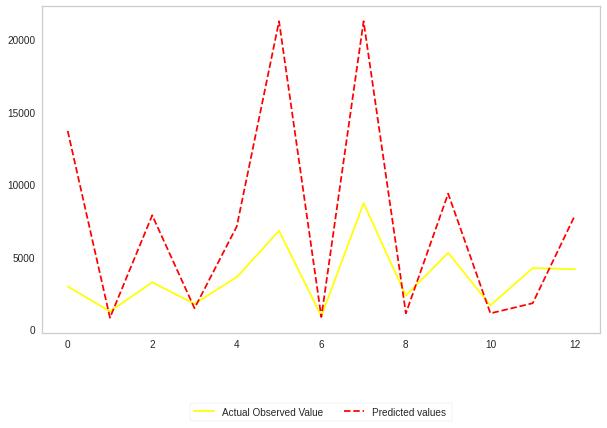

In [239]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred_svm , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()

plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)
plt.show()

In [240]:
#@title Decision tree
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# data_read = pd.read_csv('Zia_upd22.csv')

# X = data_read.iloc[:,0:8].values
# y = data_read.iloc[:,:-1].values
# regressor = DecisionTreeRegressor(random_state =0)
# regressor.fit(X, y)




In [241]:
# # @title Let Us calculate Estimated Cost With Raw Data
# x=regressor.predict([[154,4.2,0.77,2.7,12,22,310000,63]])
# print("Estimated Cost:",x[0]*100000)



In [242]:
# #@title Decision Tree Regression 
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# #data_read = pd.read_csv('Zia_upd22.csv')

# #X = data_read.iloc[:,1:8].values
# #y = data_read.iloc[:,-1].values
# #X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20 )



In [243]:
# X.shape

In [244]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [245]:
# regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

#coefficient of determination 
# print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

In [246]:
# For the training model EVALUATION
# from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [247]:
#Prediction on the training dataset
y_train_pred= regressor1.predict(X_train)
#y_train= regressor1.predict(X_train)

In [248]:
# The r_sq
# print('The r_sq ,is :',r2_score(y_train,y_train_pred))

In [249]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_train,y_train_pred))

The MAE is :   0.0


In [250]:
  # MSE 
  print('The MSE is :  ', mean_squared_error(y_train,y_train_pred))

The MSE is :   0.0


In [251]:
# RMSE 
print('The RMSE is :', np.sqrt(mean_squared_error(y_train,y_train_pred)))

The RMSE is : 0.0


In [252]:
#Prediction on the testing Data
y_test_pred = regressor1.predict(X_test)
y_test = regressor1.predict(X_test)

Now Calculating r_score 

In [253]:
# The r_sq
print('The r_sq y_test , y_test_pred is: %.2f'% r2_score(y_test,y_test_pred))

The r_sq y_test , y_test_pred is: 1.00


In [254]:
# # plotting the observed and predicted values 


# # Setting the boundaries and parameters

# plt.rcParams['figure.figsize'] = (10,6)
# x_ax =range(len(X_test))

# #plotting 
# plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
# plt.plot(x_ax,y_test_pred , label='Predicted values ' , color='red' , linestyle ='--')
# plt.grid()
# plt.ylabel('dcscfvfdscd')
# plt.xlabel('fffdcdcscfvfdscd')
# plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


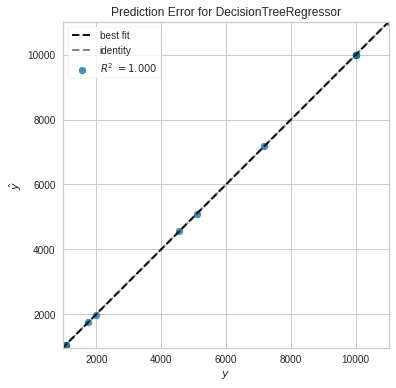

In [255]:
from yellowbrick.regressor import PredictionError 
visualizer = PredictionError(regressor1)
visualizer.fit(X_train, y_train)
visualizer.fit(X_test,y_test)
visualizer.score(X_test,y_test)
visualizer.poof()

In [256]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_test,y_test_pred ))

The MAE is :   0.0


In [257]:
#pip install yellowbrick

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


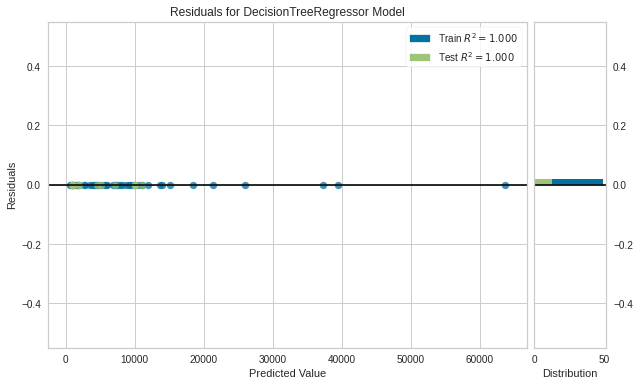

In [258]:
# Residuals plot 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor1)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [259]:
# testing the Model Evaluation



In [260]:
# MAE 
print('The MAE is :%.2f'% mean_absolute_error(y_test,y_test_pred))

The MAE is :0.00


In [261]:
# The MSE 
print('The MSE is : %.2f'% mean_squared_error(y_test,y_test_pred))

The MSE is : 0.00


In [262]:
print('The RMSE is : %.2f'% np.sqrt(mean_squared_error(y_test,y_test_pred)))

The RMSE is : 0.00


In [263]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score

In [264]:
#On the training Dataset
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(regressor1,X_train,y_train,scoring = 'neg_mean_squared_error' , cv= 10)

In [265]:
score_train

array([-1.26470071e+08, -9.57378340e+06, -4.47512772e+07, -5.44310376e+07,
       -1.47903752e+08, -1.09625606e+08, -5.79040300e+06, -1.26157558e+07,
       -4.18939718e+07, -5.13753825e+06])

In [266]:
score_train = np.mean(score_train)
print(score_train)

-55819319.685


In [267]:
# To make make it Positivme 
from numpy import absolute
score_train = absolute(score_train)
score_train

55819319.685

In [268]:
# CV on thee testing data 
score_test = cross_val_score(regressor1, X_test, y_test, scoring ='neg_mean_squared_error' , cv= 5)

In [269]:
print(score_test)

[-13939521.66666667 -14329757.66666667  -2991863.
   -522866.5        -22182085.        ]


In [270]:
#The Mean sCORE 
score_test = np.mean(score_test)
score_test

-10793218.766666666

In [271]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred,'Difference':y_test-y_test_pred})

pred_y_diff[0:62]

,Actual Values of Cost,Predicted Cost,Difference
0,11023.0,11023.0,0.0
1,963.0,963.0,0.0
2,10000.0,10000.0,0.0
3,1745.0,1745.0,0.0
4,5100.0,5100.0,0.0
5,10000.0,10000.0,0.0
6,1060.0,1060.0,0.0
7,10000.0,10000.0,0.0
8,963.0,963.0,0.0
9,1981.0,1981.0,0.0


# Random Forest Regression

In [272]:
# Let us first import The

